# Tarea 3 - Regresión

- Di Carlo, Martina
- Pastrana Analía
- Suárez Gilda

In [1]:
import pandas as pd
import numpy as np

from sklearn.linear_model import Ridge, Lasso

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor
from sklearn.neural_network import MLPRegressor

from sklearn.model_selection import GridSearchCV,  KFold

from sklearn.inspection import permutation_importance
from sklearn.metrics import r2_score, mean_squared_error

import matplotlib.pyplot as plt
import seaborn as sns
from pyprojroot import here

In [2]:
#setup para el notebook
pd.options.display.max_columns=None
pd.options.display.max_rows=None

In [3]:
path_data = here() / 'Martu' / 'Maestria' / 'data_mining' / 'practico3' / 'Datos'

In [4]:
df_train = pd.read_csv(path_data / 'regresion_train.csv')

In [5]:
df_test = pd.read_csv(path_data / 'regresion_test.csv')

## Dataset train

In [6]:
df_train.head()

,X_0,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,X_16,X_17,X_18,X_19,X_20,X_21,X_22,X_23,X_24,X_25,X_26,X_27,X_28,X_29,X_30,X_31,X_32,X_33,X_34,X_35,X_36,X_37,X_38,X_39,X_40,X_41,X_42,X_43,X_44,X_45,X_46,X_47,X_48,X_49,X_50,X_51,X_52,X_53,X_54,X_55,X_56,X_57,X_58,X_59,X_60,X_61,X_62,X_63,X_64,X_65,X_66,X_67,X_68,X_69,X_70,X_71,X_72,X_73,X_74,X_75,X_76,X_77,X_78,X_79,X_80,X_81,X_82,X_83,X_84,X_85,X_86,X_87,X_88,X_89,X_90,X_91,X_92,X_93,X_94,X_95,X_96,X_97,X_98,X_99,X_100,X_101,X_102,y
0,-1.222012,-0.443779,-0.656301,-2.080025,-1.076279,1.650658,1.176334,-0.211023,0.275922,-1.535108,-0.516441,1.128753,-0.286809,1.145210,-0.537163,0.705476,-1.219901,-0.392202,0.160574,0.393897,0.590600,-0.116437,-1.594616,-0.000647,-0.548093,-0.076417,0.935474,-1.028618,-0.896114,0.529294,-0.044457,-0.667598,0.094799,0.400100,-0.777029,-1.139626,0.320733,1.254202,0.385395,0.446780,-1.248426,-0.199922,0.335325,-1.498576,-1.419087,-0.657307,-0.113653,0.313027,0.737537,0.716209,0.533776,0.497500,-2.050162,-0.091958,-0.336020,0.640778,-0.842332,-0.397858,-0.346343,0.575121,-1.833782,-0.663746,-0.911974,-0.685988,0.009506,1.297174,-1.870246,0.375572,1.067448,0.623148,0.047978,0.243293,0.528599,-1.199541,-2.265779,0.879127,-0.542644,-0.452079,-1.121932,-1.161302,1.040700,-0.833819,1.331955,-0.770421,0.556967,-1.441077,1.608475,0.638534,0.277289,-1.140235,1.523723,-1.131412,3.058179,0.703727,0.896391,0.506170,0.136171,-0.935401,-0.279217,-1.791831,0.030780,-1.559216,-1.416431,1.582406
1,-0.030001,-1.335300,-0.398809,-0.749453,-0.195912,2.453233,-0.874909,-0.874588,1.101143,0.202064,-0.852370,-0.521611,0.133312,-0.773795,0.730211,0.603103,-0.874579,0.851914,1.641583,-0.873396,-2.251621,-1.090481,0.384625,-1.072732,-1.920839,0.134769,-0.528672,-1.653312,-0.373316,-0.089890,0.037500,-1.062670,-1.074792,0.663834,2.355077,2.226838,-0.187520,-0.658540,-0.009536,0.606242,0.978047,0.402280,2.281688,-0.531349,1.450122,2.041325,-0.218224,0.159415,1.589782,-0.656772,-0.135127,1.408866,1.026537,-0.023455,0.136232,0.485998,-0.760747,-0.476851,2.405390,-1.213717,0.951388,-0.491819,0.774481,-0.031358,1.272060,-0.594779,-0.344379,-1.029899,-0.126113,0.484859,-1.211665,-0.378685,1.424611,-1.354151,-0.534963,-0.558281,0.264340,0.112959,0.149163,0.418345,-0.914241,-0.651211,0.707875,-1.303331,-1.187622,0.748706,1.119201,-0.280607,-0.862370,0.598724,-1.554691,-0.506767,-0.556450,0.228833,0.036714,0.341752,0.224358,0.768993,-0.188038,-0.266237,-0.429974,-1.046899,0.270487,1.312503
2,-1.496163,-0.453740,-0.970579,0.641112,0.942248,-0.392630,0.037686,0.069221,-0.809579,0.245452,-0.359125,0.902921,-0.081292,0.418799,0.091223,0.917934,0.524244,0.252906,-0.017188,-2.357210,0.229880,-0.994043,-1.677631,-0.928859,-1.778332,0.067995,-0.000985,0.124065,0.608433,-0.030906,-1.799935,0.709995,-0.635363,-1.020111,1.141733,-0.631107,-0.510411,0.068405,1.245532,1.542120,-0.093366,-0.455672,-0.057793,-2.775436,-0.211774,0.146959,0.675508,1.870588,-0.627259,-0.376022,0.048150,0.289579,0.069003,0.946409,-0.049305,0.954363,0.377113,0.311226,0.426808,-0.111914,1.254410,-0.377121,-0.844629,0.602277,-0.025876,-1.443756,1.134665,0.416509,-0.449074,-0.430261,-0.888313,-1.905328,0.951203,1.556262,1.020352,1.339664,1.829154,-1.083114,-0.052677,1.059376,0.435627,0.268030,-0.936497,0.686052,-0.044201,-0.527097,1.818756,0.041051,0.316226,0.437269,-0.450676,-1.396088,1.019120,-0.105471,0.468485,-2.360157,-1.387497,-0.928721,0.519207,-1.214572,0.622536,0.330798,-2.426182,-0.086656
3,1.240578,2.458468,-1.357722,0.495117,-0.929550,-1.218413,-0.383219,0.080566,0.912191,0.681611,-1.185090,-0.495696,-0.979894,-0.640982,-1.796003,-0.602237,-0.228025,1.161271,2.347892,-2.126946,0.962331,-1.695732,1.335095,-0.206488,-2.191180,-0.280314,-0.519200,-0.601683,-1.046723,0.440926,1.766964,-0.600913,0.292122,-0.546293,-0.430704,-1.623530,1.642372,0.095089,-1.610957,0.118718,-0.137246,-0.246023,-0.476170,0.922015,0.425796,0.852327,-0.120013,0.504026,1.281586,0.386590,-0.671697,0.618200,-0.696766,-1

In [7]:
df_train.shape

(200, 104)

In [8]:
df_train.describe()

,X_0,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,X_16,X_17,X_18,X_19,X_20,X_21,X_22,X_23,X_24,X_25,X_26,X_27,X_28,X_29,X_30,X_31,X_32,X_33,X_34,X_35,X_36,X_37,X_38,X_39,X_40,X_41,X_42,X_43,X_44,X_45,X_46,X_47,X_48,X_49,X_50,X_51,X_52,X_53,X_54,X_55,X_56,X_57,X_58,X_59,X_60,X_61,X_62,X_63,X_64,X_65,X_66,X_67,X_68,X_69,X_70,X_71,X_72,X_73,X_74,X_75,X_76,X_77,X_78,X_79,X_80,X_81,X_82,X_83,X_84,X_85,X_86,X_87,X_88,X_89,X_90,X_91,X_92,X_93,X_94,X_95,X_96,X_97,X_98,X_99,X_100,X_101,X_102,y
count,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,200.000000,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,200.000000,2.000000e+02,2.000000e+02,200.000000,2.000000e+02,2.000000e+02,200.000000,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,200.000000,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,200.000000,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02
mean,-6.883383e-17,3.996803e-17,4.884981e-17,-8.881784e-18,4.884981e-17,-5.551115e-18,-2.664535e-17,-5.107026e-17,2.664535e-17,2.220446e-17,-2.664535e-17,-2.220446e-17,1.110223e-17,8.881784e-18,-2.664535e-17,1.776357e-17,8.881784e-18,2.664535e-17,4.440892e-18,2.664535e-17,1.731948e-16,3.330669e-18,2.442491e-17,5.329071e-17,1.776357e-17,-8.881784e-18,-4.440892e-18,-3.552714e-17,2.220446e-17,-2.664535e-17,0.000000,-3.885781e-17,-9.769963e-17,-2.664535e-17,-4.440892e-18,3.552714e-17,-8.881784e-18,0.000000,3.552714e-17,2.220446e-18,0.000000,-8.881784e-17,-1.776357e-17,0.000000,-4.440892e-17,4.440892e-18,2.220446e-17,-1.021405e-16,-1.021405e-16,-4.662937e-17,4.440892e-17,4.440892e-17,3.108624e-17,0.000000,4.440892e-18,-1.088019e-16,-3.552714e-17,2.664535e-17,2.220446e-17,2.442491e-17,2.664535e-17,-8.881784e-18,6.217249e-17,8.881784e-18,-3.996803e-17,2.664535e-17,6.661338e-18,-8.881784e-18,3.996803e-17,8.881784e-18,-3.996803e-17,8.881784e-18,1.776357e-17,6.217249e-17,-3.108624e-17,-4.884981e-17,7.993606e-17,1.332268e-17,4.440892e-17,5.329071e-17,-7.549517e-17,5.329071e-17,-1.110223e-18,-1.332268e-17,-1.065814e-16,3.885781e-17,-5.551115e-17,-4.440892e-18,8.881784e-18,0.000000,3.552714e-17,-4.440892e-17,-2.220446e-17,4.440892e-17,1.221245e-17,2.220446e-17,1.776357e-17,-5.329071e-17,-2.220446e-17,-1.554312e-17,1.154632e-16,-3.552714e-17,-8.881784e-18,-1.465494e-16
std,1.002509e+00,1.002509e+00,1.002509e+00,1.002509e+00,1.002509e+00,1.002509e+00,1.002509e+00,1.002509e+00,1.002509e+00,1.002509e+00,1.002509e+00,1.002509e+00,1.002509e+00,1.002509e+00,1.002509e+00,1.002509e+00,1.002509e+00,1.002509e+00,1.002509e+00,1.002509e+00,1.002509e+00,1.002509e+00,1.002509e+00,1.002509e+00,1.002509e+00,1.002509e+00,1.002509e+00,1.002509e+00,1.002509e+00,1.002509e+00,1.002509,1.002509e+00,1.002509e+00,1.002509e+00,1.002509e+00,1.002509e+00,1.002509e+00,1.002509,1.002509e+00,1.002509e+00,1.002509,1.002509e+00,1.002509e+00,1.002509,1.002509e+00,1.002509e+00,1.002509e+00,1.002509e+00,1.002509e+00,1.002509e+00,1.002509e+00,1.002509e+00,1.002509e+00,1.002509,1.002509e+00,1.002509e+00,1.002509e+00,1.002509e+00,1.002509e+00,1.002509e+00,1

In [9]:
sum(df_train.isna().sum())

0

## Dataset test

In [10]:
df_test.head()

,X_0,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,X_16,X_17,X_18,X_19,X_20,X_21,X_22,X_23,X_24,X_25,X_26,X_27,X_28,X_29,X_30,X_31,X_32,X_33,X_34,X_35,X_36,X_37,X_38,X_39,X_40,X_41,X_42,X_43,X_44,X_45,X_46,X_47,X_48,X_49,X_50,X_51,X_52,X_53,X_54,X_55,X_56,X_57,X_58,X_59,X_60,X_61,X_62,X_63,X_64,X_65,X_66,X_67,X_68,X_69,X_70,X_71,X_72,X_73,X_74,X_75,X_76,X_77,X_78,X_79,X_80,X_81,X_82,X_83,X_84,X_85,X_86,X_87,X_88,X_89,X_90,X_91,X_92,X_93,X_94,X_95,X_96,X_97,X_98,X_99,X_100,X_101,X_102,y
0,0.792961,0.386276,-1.759855,-0.396720,-0.871772,0.776977,-0.563522,-0.975155,0.665206,1.180950,-0.949066,0.496416,-0.704981,-0.752218,-1.425550,2.395437,0.086495,0.546280,-0.181337,0.917081,0.602705,-0.156486,-0.895082,-0.753127,-0.061424,-0.391539,0.522673,0.541430,0.089509,0.016877,-0.080723,-0.067257,-0.011362,-0.363975,0.078748,0.785101,-1.153855,-0.867561,0.396131,-1.708396,0.951654,-1.496309,-0.471300,0.452948,-1.757524,0.656988,1.653068,-0.746884,-2.506617,0.000514,1.862266,-2.290539,-0.370781,-0.640856,-1.374284,3.051749,-0.342603,1.093263,1.103654,-0.608427,-0.378938,2.406607,-0.419647,0.383087,1.088764,0.262632,-1.111146,0.029196,-0.835284,1.771508,0.361280,-1.220909,-0.086620,-0.386232,-1.436286,-0.619179,-0.308415,-1.606597,-0.118830,0.467186,-1.564774,1.034076,-0.637856,1.749330,-1.128156,0.752519,0.023088,0.019524,-0.629964,0.738213,1.222182,0.697834,1.374937,-0.886565,0.117716,0.801546,0.600417,-2.087825,0.295941,-0.468219,-0.107127,-0.280075,-0.568778,1.498866
1,0.662430,0.785541,-0.131567,-0.837476,1.062010,-1.443463,-0.576412,-0.388026,-1.156177,-0.913274,-0.873643,-0.703226,-0.128033,-0.102225,0.259337,-0.515111,-0.973337,1.368435,-0.826476,0.716630,-1.999353,0.745799,0.194374,-1.361683,0.103915,0.120953,0.459844,-1.961529,1.925427,-2.093146,-0.385842,0.681508,-1.476620,0.752348,1.669427,0.215497,1.097640,-1.120930,0.134052,-0.274883,1.904392,-2.142564,-1.367858,1.123024,-1.952263,-0.412380,-2.452041,-1.379205,0.647253,-1.408157,0.400397,0.121352,0.833236,0.021016,-0.917481,-0.029770,-0.292093,-0.856755,1.603910,0.078226,0.041021,-0.735992,-0.821291,-0.573430,0.183183,0.386404,0.278639,0.717099,1.313859,0.898045,-0.237545,-1.409877,0.519204,1.187918,0.849215,0.538618,1.387749,-0.340556,1.741265,1.414908,-0.849941,2.194064,-0.025830,-0.724344,-0.766198,1.169331,0.487869,1.008361,0.033840,-0.975077,1.562470,0.495092,-0.525760,0.384026,-2.122495,0.183541,-1.138203,1.195905,0.973817,0.317592,0.929332,-0.040182,-0.386408,-0.137970
2,0.239635,-0.630082,-0.147324,0.911476,-0.435605,-0.243608,0.213385,-0.336817,1.119093,0.408933,0.082274,-0.611901,0.881788,-0.301811,1.477246,0.552892,-1.286901,1.198451,-0.580868,-0.282667,0.565219,-1.098955,-1.427806,-0.425177,-0.820548,0.853892,0.104409,0.852896,2.021239,-0.161782,-0.880883,0.281643,-0.225386,-1.852227,-0.881635,-0.243776,-0.206406,1.301240,1.139239,-0.844934,0.094499,-0.447720,-0.317638,-1.837410,-0.239040,1.655254,-0.864964,1.051399,1.291220,0.327556,0.183831,0.295527,-2.025217,-1.025206,-1.693125,1.492678,-1.803108,-0.697935,-1.275157,-1.687815,0.887954,-0.732158,-0.583947,0.226723,1.331116,-0.761273,-1.935691,-1.697268,1.062741,-0.525279,0.977887,-0.084658,0.622605,-0.350915,0.383027,0.175573,0.108946,0.464525,0.864042,1.327698,-1.154262,-0.083905,0.870553,-1.572626,-0.289680,-0.886233,-0.178939,0.686184,-0.548013,2.291247,-0.511708,-2.130606,-0.640753,-0.409281,-1.285731,0.829210,1.102841,1.304890,1.140916,2.136680,0.713449,0.852989,1.291815,1.011481
3,0.286542,-1.372627,-0.982177,-0.581376,0.936256,0.375409,0.141130,-2.045771,-1.008772,0.992924,-0.426993,-0.270717,-1.221652,-0.430280,0.017373,-0.615171,-0.525423,-0.298324,-0.967047,-1.070991,0.387721,0.147153,-0.783688,2.133928,-1.209665,0.398764,-1.040792,0.027175,1.995457,-1.988353,0.250332,-0.368532,0.682774,-0.151596,-0.280233,-0.155028,-0.080152,1.160321,-2.112987,-0.951443,1.847957,1.690274,2.146381,-0.829321,0.730202,0.001099,-0.300713,-0.050186,0.790338,-1.203028,0.157444,-1.732567,-2.466985,0.8633

In [11]:
df_test.shape

(800, 104)

In [12]:
df_test.describe()

,X_0,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,X_16,X_17,X_18,X_19,X_20,X_21,X_22,X_23,X_24,X_25,X_26,X_27,X_28,X_29,X_30,X_31,X_32,X_33,X_34,X_35,X_36,X_37,X_38,X_39,X_40,X_41,X_42,X_43,X_44,X_45,X_46,X_47,X_48,X_49,X_50,X_51,X_52,X_53,X_54,X_55,X_56,X_57,X_58,X_59,X_60,X_61,X_62,X_63,X_64,X_65,X_66,X_67,X_68,X_69,X_70,X_71,X_72,X_73,X_74,X_75,X_76,X_77,X_78,X_79,X_80,X_81,X_82,X_83,X_84,X_85,X_86,X_87,X_88,X_89,X_90,X_91,X_92,X_93,X_94,X_95,X_96,X_97,X_98,X_99,X_100,X_101,X_102,y
count,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,-0.147907,-0.154013,-0.024421,-0.081807,-0.008824,0.133714,-0.008841,-0.024937,0.051020,0.014187,0.030920,0.019383,0.063145,-0.079317,0.019608,0.024964,0.001359,0.150085,-0.099204,-0.049888,-0.062619,0.033143,-0.075135,-0.021467,-0.131942,0.013851,0.090333,-0.006718,0.091208,0.094733,0.025072,-0.052028,0.129099,-0.102257,-0.159443,-0.035199,-0.052998,0.032778,-0.145210,-0.017049,0.025488,0.068349,0.121245,-0.009502,-0.182433,0.048134,-0.100676,0.029538,-0.107118,-0.157671,-0.023444,-0.192622,-0.005463,-0.036723,-0.105522,-0.109352,-0.044976,0.095845,0.135093,-0.072211,-0.079088,0.161408,0.150082,0.103641,0.021862,-0.017743,-0.029520,0.014045,-0.168842,-0.058440,0.022541,-0.018942,-0.021262,-0.058845,-0.098874,-0.043866,0.072895,-0.028701,-0.038162,0.243909,-0.055875,0.025441,0.063638,-0.168875,-0.157390,-0.068015,-0.003265,-0.060880,-0.074269,-0.020392,0.062396,-0.123244,-0.035411,0.010993,0.035866,0.079225,0.029654,-0.011790,0.001242,0.157247,-0.114301,0.117878,0.088294,0.071577
std,0.955647,0.932383,1.017328,1.035231,1.012006,1.029882,0.990281,0.919415,0.960334,0.997087,1.052939,0.964680,0.975903,0.918400,0.922651,1.035572,0.997246,1.033378,0.980388,1.013259,1.011543,1.073499,1.085834,0.944019,1.079451,0.984543,0.958109,0.979912,1.114601,0.984242,0.916375,1.049916,0.998054,1.092578,0.982589,0.950256,0.906340,1.031598,0.999325,0.964846,0.996024,1.029922,1.084635,0.963326,0.946270,1.057909,1.075658,0.981999,0.988381,1.084543,0.929691,1.109026,0.970730,1.029382,1.062218,1.009377,0.977368,0.983797,1.038170,1.004748,1.020214,1.010327,0.983464,1.133016,0.925911,0.975481,1.035084,1.128558,0.999282,1.005471,0.948899,1.031801,1.009350,0.966683,0.977044,0.977680,1.008129,1.067041,1.030561,1.020955,0.929228,1.036913,1.035121,0.945023,0.913192,0.950228,1.053965,0.965205,0.965544,0.975181,0.986767,1.029796,1.000240,0.987296,1.003459,0.953290,0.972725,0.974024,0.956551,0.982051,0.958447,1.084777,1.072699,1.018149
min,-3.308574,-3.412230,-3.602951,-3.311423,-3.217163,-3.201756,-2.809108,-2.789433,-3.162520,-3.314917,-1.696364,-2.737124,-2.909730,-2.603646,-2.662582,-2.985202,-3.408582,-2.922384,-3.018191,-3.351226,-2.327980,-2.822358,-3.460389,-2.940670,-3.575082,-3.397827,-2.675534,-3.608014,-3.765704,-2.895632,-2.092667,-3.386011,-3.575008,-3.114845,-3.398393,-3.215415,-2.769176,-2.983073,-3.484320,-2.44

In [13]:
sum(df_test.isna().sum())

0

In [14]:
df = pd.concat([df_train, df_test])

### Correlaciones entre los datos

In [15]:
c = df.corr().abs()

s = c.unstack()
so = pd.DataFrame(s.sort_values(kind="quicksort",ascending = False))
indices = so.iloc[104:120,:].index

In [16]:
campos = [item for t in list(indices) for item in t]
campos = list(dict.fromkeys(campos))

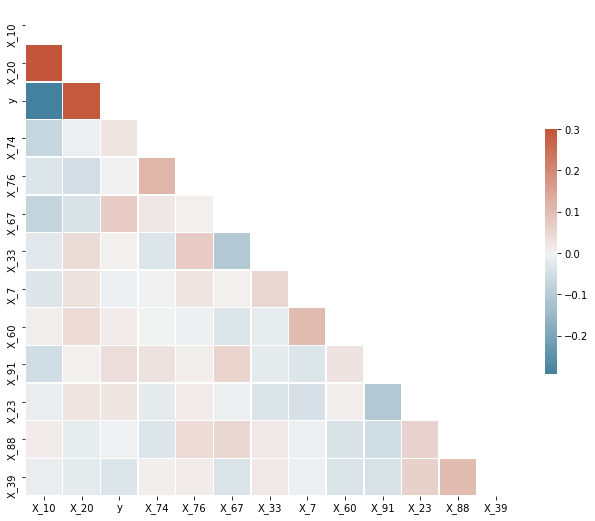

In [17]:
corr = df[campos].corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

### X e y

In [18]:
X_train = df_train.loc[:, df_train.columns != 'y']
y_train = df_train.y

X_test = df_test.loc[:, df_train.columns != 'y']
y_test = df_test.y

## 1.a

 **1.** Los archivos 'regresion_train.csv' y 'regresion_test.csv' contienen datos para realizar
una regresión. El formato es de un dataframe de 200x104 y 800x104 filas por
columnas para train y test respectivamente. Los datos son ‘X_num’, donde num va
de 0 a 102 y la variable continua a predecir es ‘y’. Los datos se encuentran
escalados y libres de outliers.  
&nbsp;&nbsp;&nbsp;&nbsp;  **a.** El primer objetivo es entrenar al menos un modelo que realice la regresión con un
score R2 de 0.85 o más en test. Se puede ver la definición de dicho score en
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegr
ession.html. Por defecto todos los modelos de regresión de sklearn utilizan dicho
score. (1 pt por entrenar 1 modelo o 2 pts por 2 modelos)  


#### Lasso

In [19]:
cv = KFold(n_splits=10, random_state=17, shuffle=True)

In [20]:
alpha_par = np.arange(0, 1, 0.05)
lml = Lasso()
tunner_lml = GridSearchCV(estimator=lml, 
                          param_grid={'alpha':alpha_par},
                          cv=cv, 
                          scoring= 'r2',
                          n_jobs=-1)
_=tunner_lml.fit(X_train, y_train)

y_te_pred = tunner_lml.predict(X_test)
y_tr_pred = tunner_lml.predict(X_train)

print('RMSE train')
print(f'{mean_squared_error(y_train, y_tr_pred) :.3}')

print('RMSE test')
print(f'{mean_squared_error(y_test, y_te_pred) :.3}')

print('R2 train')
print(f'{r2_score(y_train, y_tr_pred) :.3}')

print('R2 test')
print(f'{r2_score(y_test, y_te_pred) :.3}')


RMSE train
0.568
RMSE test
0.889
R2 train
0.432
R2 test
0.141


#### Ridge

In [21]:
alpha_par = np.arange(0, 1, 0.05)

ridgel = Ridge()
tunner_r = GridSearchCV(estimator=ridgel, 
                          param_grid={'alpha':alpha_par},
                          cv=cv, 
                          n_jobs=-1)
_=tunner_r.fit(X_train, y_train)

y_te_pred_r = tunner_r.predict(X_test)
y_tr_pred_r = tunner_r.predict(X_train)

print('RMSE train')
print(f'{mean_squared_error(y_train, y_tr_pred_r) :.3}')

print('RMSE test')
print(f'{mean_squared_error(y_test, y_te_pred_r) :.3}')

print('R2 train')
print(f'{r2_score(y_train, y_tr_pred_r) :.3}')

print('R2 test')
print(f'{r2_score(y_test, y_te_pred_r) :.3}')


RMSE train
0.38
RMSE test
1.58
R2 train
0.62
R2 test
-0.525


Tanto Ridge como Lasso performan muy mal. Probamos con modelos no paramétricos y no lineales:

#### Bagging Regressor

In [22]:
t = DecisionTreeRegressor()
par = list(np.arange(0.0, 1., step=0.05))
bag = BaggingRegressor(base_estimator=t, n_estimators=20, random_state=0, n_jobs=-1)
tunner_bag = GridSearchCV(estimator=bag, param_grid={'base_estimator__ccp_alpha':par}, cv=cv)
_=tunner_bag.fit(X_train, y_train)

In [23]:
y_te_pred_b = tunner_bag.predict(X_test)
y_tr_pred_b = tunner_bag.predict(X_train)

In [24]:
print('RMSE train')
print(f'{mean_squared_error(y_train, y_tr_pred_b) :.3}')

print('RMSE test')
print(f'{mean_squared_error(y_test, y_te_pred_b) :.3}')

print('R2 train')
print(f'{r2_score(y_train, y_tr_pred_b) :.3}')

print('R2 test')
print(f'{r2_score(y_test, y_te_pred_b) :.3}')

RMSE train
0.017
RMSE test
0.0816
R2 train
0.983
R2 test
0.921


#### RandomForest Regressor

In [25]:
rf = RandomForestRegressor()
n_estimators = [10, 20, 30, 100, 250, 500]
tunner_rf = GridSearchCV(estimator=rf, 
                          param_grid={'n_estimators':n_estimators}, 
                          cv=cv)
_=tunner_rf.fit(X_train, y_train)

In [26]:
y_te_pred_rf = tunner_rf.predict(X_test)
y_tr_pred_rf = tunner_rf.predict(X_train)

In [27]:
print('RMSE train')
print(f'{mean_squared_error(y_train, y_tr_pred_rf) :.3}')

print('RMSE test')
print(f'{mean_squared_error(y_test, y_te_pred_rf) :.3}')

print('R2 train')
print(f'{r2_score(y_train, y_tr_pred_rf) :.3}')

print('R2 test')
print(f'{r2_score(y_test, y_te_pred_rf) :.3}')

RMSE train
0.014
RMSE test
0.0783
R2 train
0.986
R2 test
0.924


#### MLP Regressor

In [28]:
ann = MLPRegressor(hidden_layer_sizes=100, 
                   activation='relu', 
                   max_iter=2000, 
                   early_stopping=True)

shrink = 10**np.arange(-5, -1, step=1, dtype=np.float64)

cv = KFold(n_splits=5, random_state=0, shuffle=True)

tunner_rn = GridSearchCV(estimator=ann, 
                         param_grid={'alpha':shrink}, 
                         cv=cv)
_=tunner_rn.fit(X_train, y_train)

In [29]:
model = np.argmax(tunner_rn.cv_results_['mean_test_score'])
ann = MLPRegressor(hidden_layer_sizes=100, 
                   activation='relu', 
                   max_iter=2000, 
                   alpha=tunner_rn.cv_results_['param_alpha'][model],
                   early_stopping=True)
ann.fit(X_train, y_train)
y_te_pred_rn = ann.predict(X_test)
y_tr_pred_rn = ann.predict(X_train)


print('RMSE train')
print(f'{mean_squared_error(y_train, y_tr_pred_rn) :.3}')

print('RMSE test')
print(f'{mean_squared_error(y_test, y_te_pred_rn) :.3}')

print('R2 train')
print(f'{r2_score(y_train, y_tr_pred_rn) :.3}')

print('R2 test')
print(f'{r2_score(y_test, y_te_pred_rn) :.3}')

RMSE train
0.112
RMSE test
1.63
R2 train
0.888
R2 test
-0.575


Tanto el bagging del arbol común y el random forest tienen muy buenas performances tanto para train y test. Los scores en train y test estan un poco alejados por lo que podriamos sospechar que existe algo de sobre ajuste. La red neuronal tiene muy mal score de R2 en test.

## 1.b

&nbsp;&nbsp;&nbsp;&nbsp;**b.** Utilizando la funcion ‘permutation_importance’ de sklearn 
(https://scikit-learn.org/stable/modules/generated/sklearn.inspection.permutation_importance.html)
encuentre las variables mas importantes para realizar dicha regresion. Los datos
se generaron con n variables con información y ruido gaussiano adicionado (m
variables solamente con ruido gaussiano). Utilizar las gráficas que crea
necesarias y justificar los resultados con una breve explicación (2 pts)
Una vez seleccionadas las variables más importantes puede verificarlas entrenando
modelos que anteriormente no lograron llegar al corte fijado en R2=0.85. En todos
los casos reporte errores de train y test.   

### Bagging

In [30]:
result_bag = permutation_importance(tunner_bag, X_train, y_train, n_repeats=30, random_state=42, n_jobs=-1)
perm_sorted = result_bag.importances_mean.argsort()

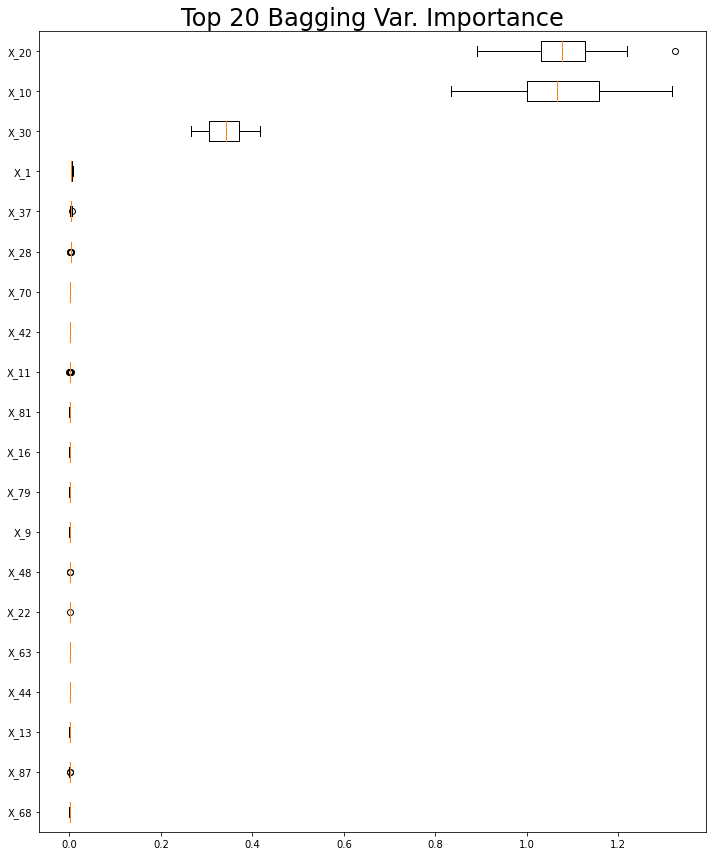

In [31]:
fig, ax = plt.subplots(figsize=(10, 12))
ax.boxplot(result_bag.importances[perm_sorted[-20:]].T, vert=False, labels=df_train.columns[perm_sorted[-20:]])
ax.set_title("Top 20 Bagging Var. Importance", fontsize=24)

fig.tight_layout()
plt.show()

### Lasso

In [32]:
result_lasso = permutation_importance(tunner_lml, 
                                      X_train, 
                                      y_train, 
                                      n_repeats=30, 
                                      random_state=42, 
                                      n_jobs=-1)
perm_sorted_lasso = result_lasso.importances_mean.argsort()


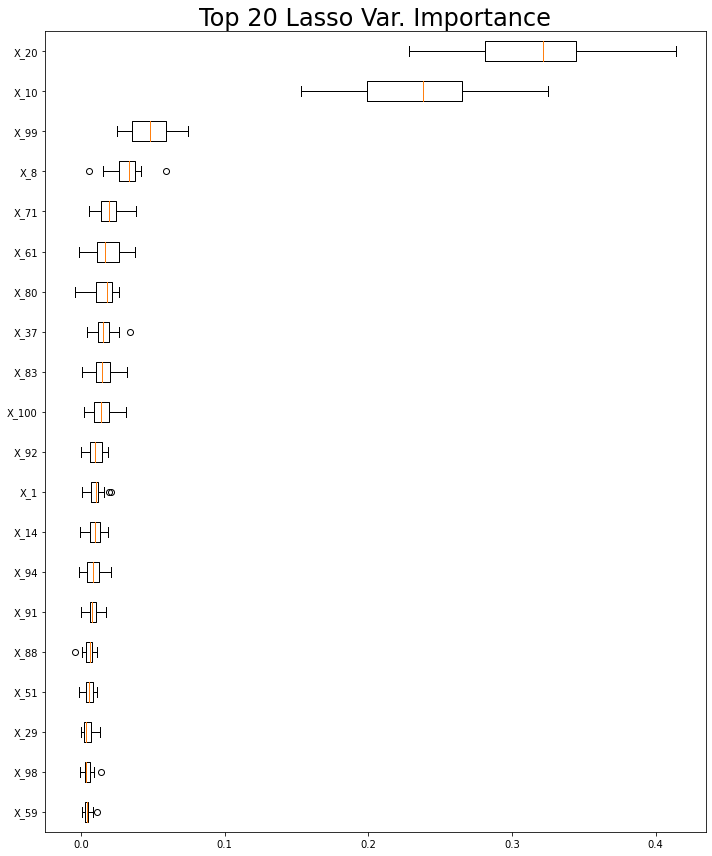

In [33]:
fig, ax = plt.subplots(figsize=(10, 12))
ax.boxplot(result_lasso.importances[perm_sorted_lasso[-20:]].T, 
           vert=False, 
           labels=df_train.columns[perm_sorted_lasso[-20:]])
ax.set_title("Top 20 Lasso Var. Importance", fontsize=24)

fig.tight_layout()
plt.show()


### Ridge

In [34]:
result_ridge = permutation_importance(tunner_r, 
                                      X_train, 
                                      y_train, 
                                      n_repeats=30, 
                                      random_state=42, 
                                      n_jobs=-1)
perm_sorted_ridge = result_ridge.importances_mean.argsort()


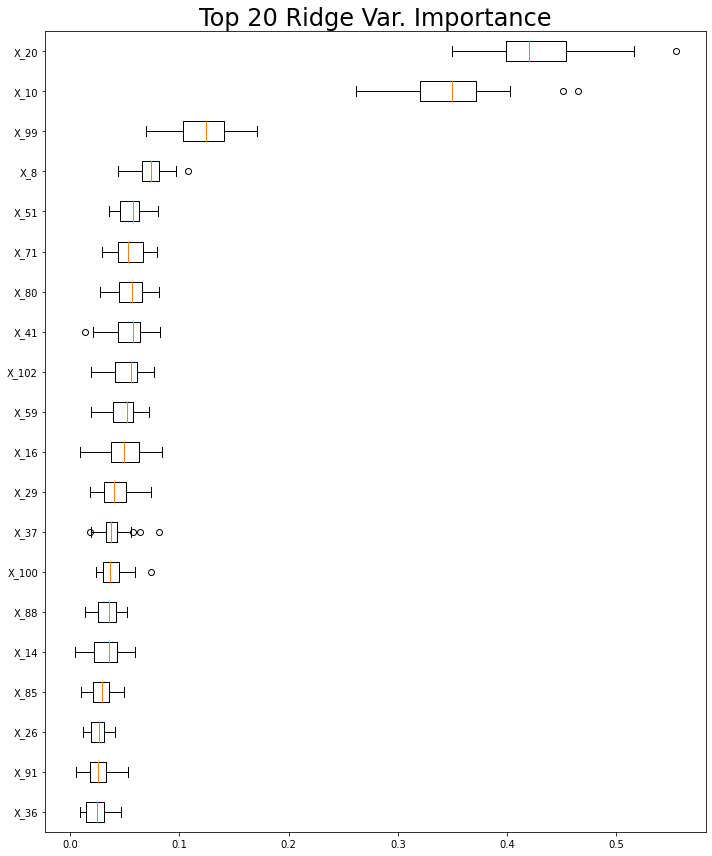

In [35]:
fig, ax = plt.subplots(figsize=(10, 12))
ax.boxplot(result_ridge.importances[perm_sorted_ridge[-20:]].T, 
           vert=False, 
           labels=df_train.columns[perm_sorted_ridge[-20:]])
ax.set_title("Top 20 Ridge Var. Importance", fontsize=24)

fig.tight_layout()
plt.show()


### Random Forest

In [36]:
result_rf = permutation_importance(tunner_rf, 
                                      X_train, 
                                      y_train, 
                                      n_repeats=30, 
                                      random_state=42, 
                                      n_jobs=-1)
perm_sorted_rf = result_rf.importances_mean.argsort()


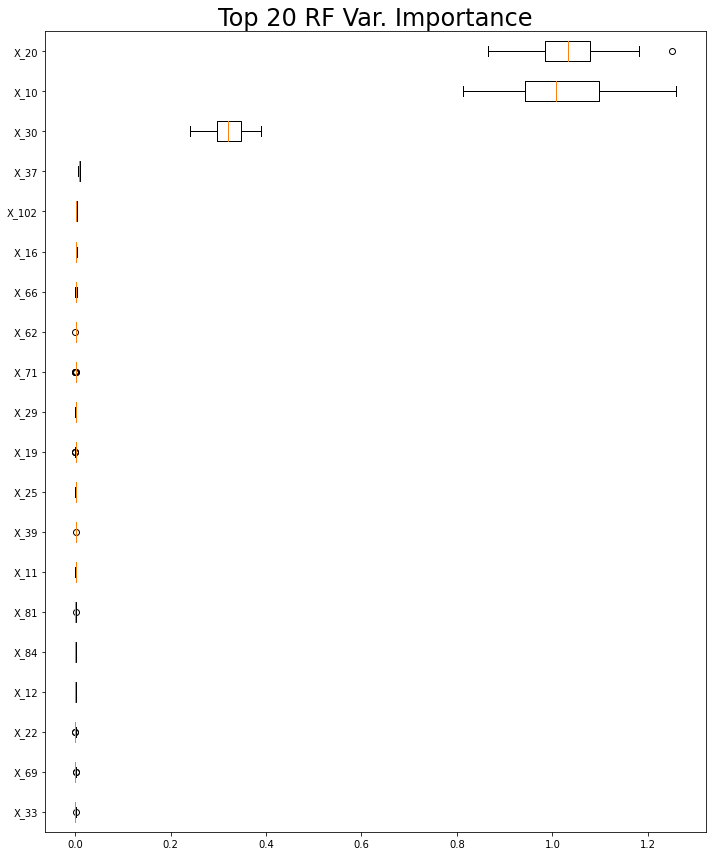

In [37]:
fig, ax = plt.subplots(figsize=(10, 12))
ax.boxplot(result_rf.importances[perm_sorted_rf[-20:]].T, 
           vert=False, 
           labels=df_train.columns[perm_sorted_rf[-20:]])
ax.set_title("Top 20 RF Var. Importance", fontsize=24)

fig.tight_layout()
plt.show()


### ANN

In [38]:
result_ann = permutation_importance(tunner_rn, 
                                      X_train, 
                                      y_train, 
                                      n_repeats=30, 
                                      random_state=42, 
                                      n_jobs=-1)
perm_sorted_ann = result_ann.importances_mean.argsort()

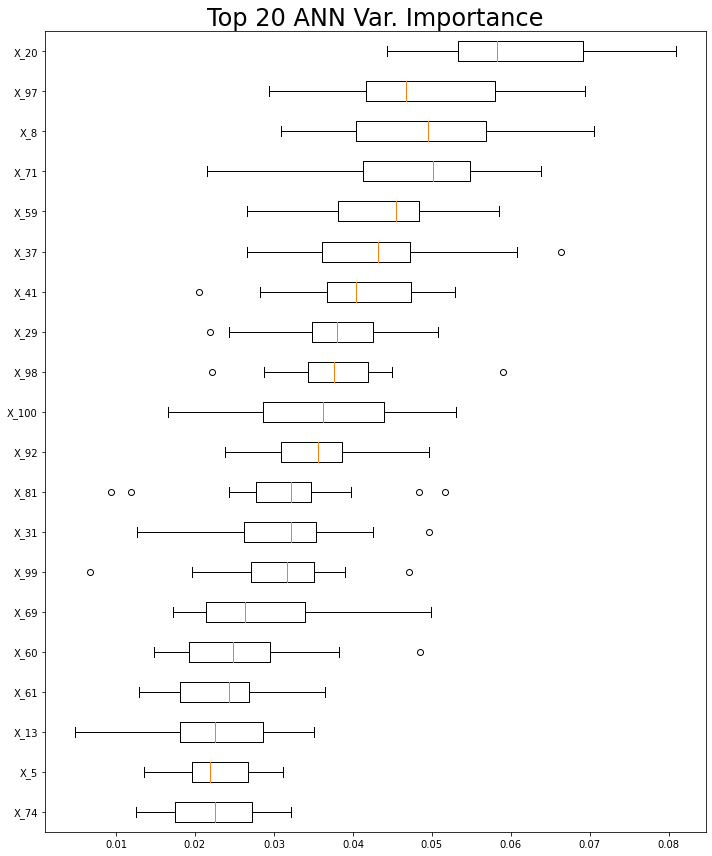

In [39]:
fig, ax = plt.subplots(figsize=(10, 12))
ax.boxplot(result_ann.importances[perm_sorted_ann[-20:]].T, 
           vert=False, 
           labels=df_train.columns[perm_sorted_ann[-20:]])
ax.set_title("Top 20 ANN Var. Importance", fontsize=24)

fig.tight_layout()
plt.show()


### Seleccion de variables

Seleccionamos las X_10, X_20 y X_30 que son todas las que en general quedan arriba de todo en el permutation importance y ademas eran las que mas correlacion tenían entre si y con la y.

In [40]:
X_train = X_train[['X_10', 'X_20', 'X_30']].copy()
X_test = X_test[['X_10', 'X_20', 'X_30']].copy()

Con estas variables probamos entrenar una red neuronal y vemos su rendimiento:

In [41]:
ann = MLPRegressor(hidden_layer_sizes=100, 
                   activation='relu', 
                   max_iter=2000, 
                   early_stopping=True)

shrink = 10**np.arange(-5, -1, step=1, dtype=np.float64)

cv = KFold(n_splits=5, random_state=0, shuffle=True)

tunner_rn = GridSearchCV(estimator=ann, 
                         param_grid={'alpha':shrink}, 
                         cv=cv)
_=tunner_rn.fit(X_train, y_train)

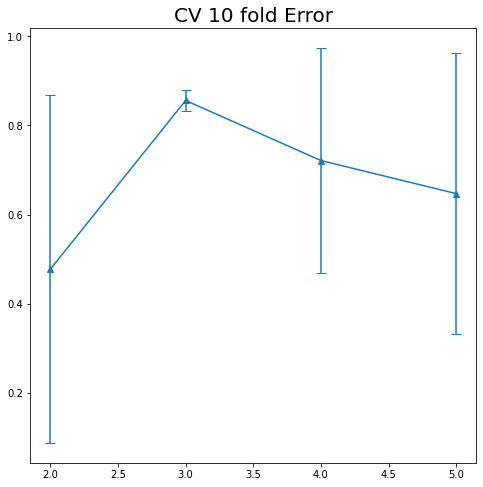

In [42]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)

x = -np.log10(np.array(tunner_rn.cv_results_['param_alpha']).astype(np.float64))
ax.errorbar(x, 
            tunner_rn.cv_results_['mean_test_score'], 
            yerr=tunner_rn.cv_results_['std_test_score'], 
            capsize=5,marker='^')
_=ax.set_title('CV 10 fold Error', fontsize=20)

In [43]:
model = np.argmax(tunner_rn.cv_results_['mean_test_score'])
ann = MLPRegressor(hidden_layer_sizes=100, 
                   activation='relu', 
                   max_iter=2000, 
                   alpha=tunner_rn.cv_results_['param_alpha'][model],
                   early_stopping=True)
ann.fit(X_train, y_train)
y_te = ann.predict(X_test)
print(f'Train score: {ann.score(X_train, y_train):.3}')
print(f'Test score: {ann.score(X_test, y_test):.3}')

Train score: 0.968
Test score: 0.909


0.9545428375655691


Text(0, 0.5, 'y True')

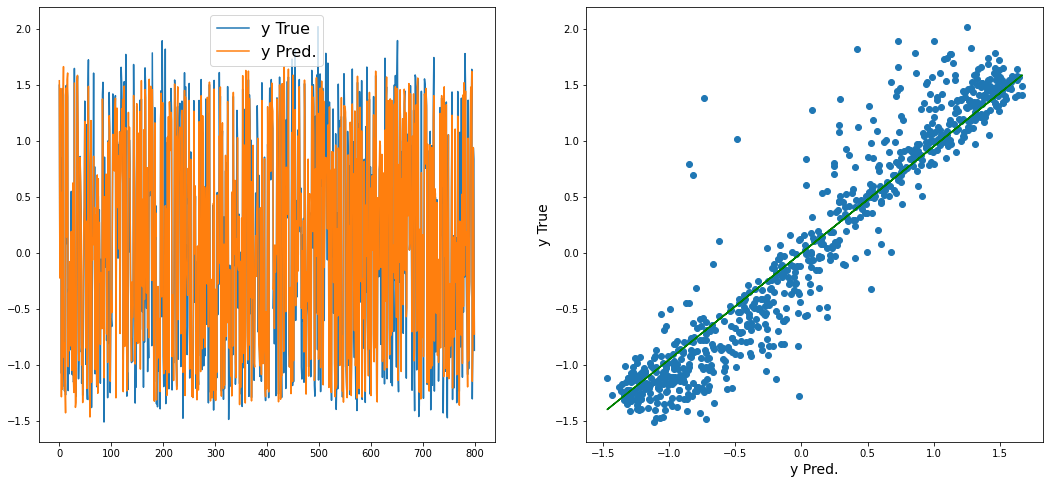

In [44]:
fig = plt.figure(figsize=(18,8))
ax = fig.add_subplot(121)
ax.plot(y_test, label='y True')
ax.plot(y_te, label='y Pred.')
ax.legend(loc='best', fontsize=16)
ax = fig.add_subplot(122)
ax.scatter(y_te, y_test)
alpha=np.corrcoef(y_te, y_test).ravel()[1]
print(alpha)
ax.plot(y_te, y_te*alpha, c='g')
ax.set_xlabel('y Pred.', fontsize=14)
ax.set_ylabel('y True', fontsize=14)

La comparamos con el Random Forest que tambien nos habia dado buenos resultados, pero con el nuevo dataset:

In [45]:
rf = RandomForestRegressor()
n_estimators = [10, 20, 30, 100, 250, 500]
tunner_rf = GridSearchCV(estimator=rf, 
                          param_grid={'n_estimators':n_estimators}, 
                          cv=cv)
_=tunner_rf.fit(X_train, y_train)

In [46]:
y_te_pred_rf = tunner_rf.predict(X_test)
y_tr_pred_rf = tunner_rf.predict(X_train)

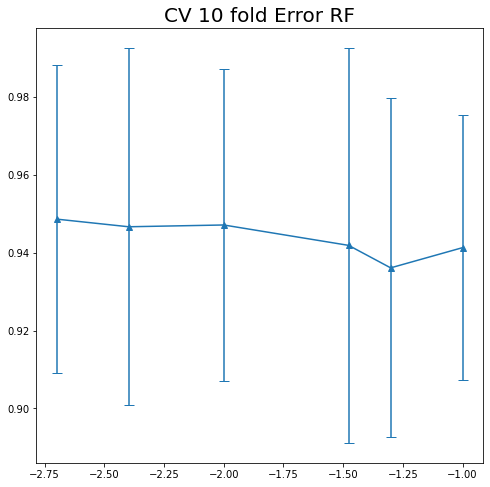

In [47]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)

x = -np.log10(np.array(tunner_rf.cv_results_['param_n_estimators']).astype(np.float64))
ax.errorbar(x, 
            tunner_rf.cv_results_['mean_test_score'], 
            yerr=tunner_rf.cv_results_['std_test_score'], 
            capsize=5,marker='^')
_=ax.set_title('CV 10 fold Error RF', fontsize=20)

In [48]:
model = np.argmax(tunner_rf.cv_results_['mean_test_score'])
model

5

In [49]:
tunner_rf.cv_results_['param_n_estimators'][model]

500

In [50]:
rf = RandomForestRegressor(n_estimators = 500)
rf.fit(X_train, y_train)
y_te = rf.predict(X_test)
print(f'Train score: {rf.score(X_train, y_train):.3}')
print(f'Test score: {rf.score(X_test, y_test):.3}')

Train score: 0.995
Test score: 0.975


0.9877809650448593


Text(0, 0.5, 'y True')

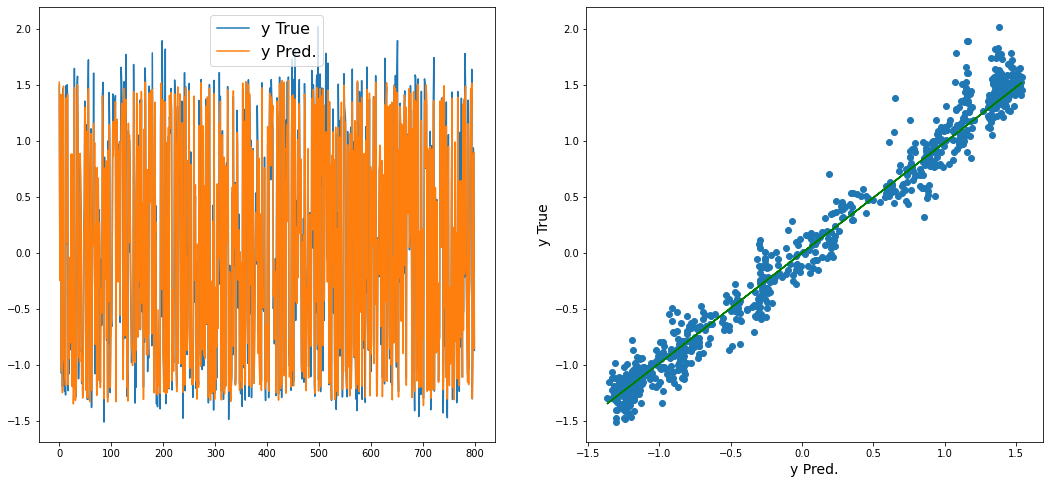

In [51]:
fig = plt.figure(figsize=(18,8))
ax = fig.add_subplot(121)
ax.plot(y_test, label='y True')
ax.plot(y_te, label='y Pred.')
ax.legend(loc='best', fontsize=16)
ax = fig.add_subplot(122)
ax.scatter(y_te, y_test)
alpha=np.corrcoef(y_te, y_test).ravel()[1]
print(alpha)
ax.plot(y_te, y_te*alpha, c='g')
ax.set_xlabel('y Pred.', fontsize=14)
ax.set_ylabel('y True', fontsize=14)

El mejor predictor que logramos es el Random Forest. Es muy llamativa la diferencia entre la red neuronal con el dataset entero y la red neuronal con las 3 columnas predictoras relevantes, evidentemente este método se ve muy influenciado ante la presencia de variables aleatoreas, mientras que sabemos que los modelos basados en árboles no lo son.